In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [18]:
df = pd.read_csv('titanic_toy.csv')

In [19]:
df.sample(5)

,Age,Fare,Family,Survived
724,27.0,53.1000,1,1
125,12.0,11.2417,1,1
227,20.5,7.2500,0,0
356,22.0,55.0000,1,1
388,NaN,7.7292,0,0


In [20]:
df.shape

(891, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [22]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [23]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


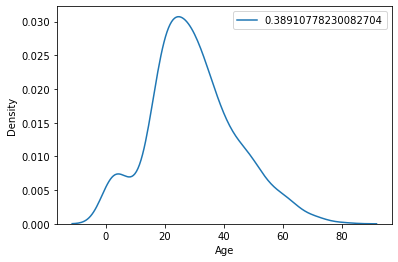

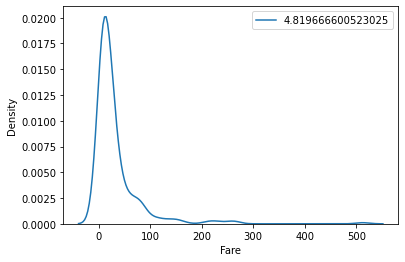

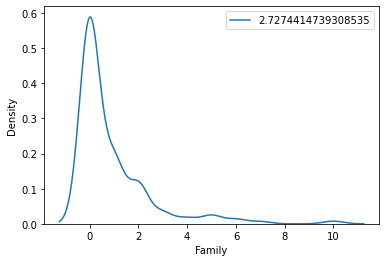

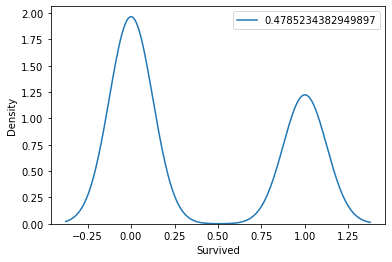

In [32]:
for i in df.columns:
        sns.kdeplot(df[i] ).legend({df[i].skew()})
        plt.show()

In [33]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [34]:
X = df.drop(columns = ['Survived'] , axis =1)
y =df['Survived']

In [36]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2) 

In [38]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [37]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [39]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [41]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [45]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
449,52.0,30.5000,0,52.0,52.0,30.5000,30.5000
866,27.0,13.8583,1,27.0,27.0,13.8583,13.8583
191,19.0,13.0000,0,19.0,19.0,13.0000,13.0000
403,28.0,15.8500,1,28.0,28.0,15.8500,15.8500
232,59.0,13.5000,0,59.0,59.0,13.5000,13.5000


***After making imputations :*** 
- ***Do check the variance of columns {Before and after}***
- ***Do plot the Distribution plots {Before and after}***
- ***Check the covariance {Before and after}.***
- ***Plot the boxplots to check about the outliers.***

In [49]:
#Age
print('Original Age Variable variance: ', X_train['Age'].var())
print('Age variance after median imputation: ', X_train['Age_median'].var())
print('Age variance after mean imputationVariable: ', X_train['Age_mean'].var())

print('\n')
# Fare
print('Original Fare Variable variance: ', X_train['Fare'].var())
print('Fare variance after median imputation: ', X_train['Fare_median'].var())
print('Fare variance after mean imputationVariable: ', X_train['Fare_mean'].var())


Original Age Variable variance:  204.34951339046142
Age variance after median imputation:  161.98956633460548
Age variance after mean imputationVariable:  161.81262452718676


Original Fare Variable variance:  2448.1979137063163
Fare variance after median imputation:  2340.09102197536
Fare variance after mean imputationVariable:  2324.2385256705534


> - ***After doing mean median imputation , our variance(spread) gets shrinked as more values are tending towards mean, like we can see in Age column, but it is digestible and could have been a red flag if the changes were drastic.***
> - ***Now if I talk about Fare there are not that much changes because there are less null/NAN values in fare,so less imputation hence less values  getting towards mean , which means variance would be somewhat similar.***

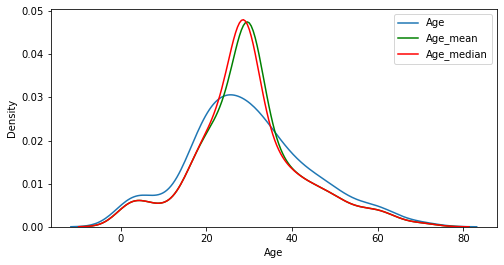

In [66]:
fig , ax = plt.subplots(1,figsize = (8,4))

leg = {'Age':'blue','Age_mean':'green','Age_median':'red'}
sns.kdeplot(X_train['Age'] )
sns.kdeplot(X_train['Age_mean'], color = 'green')
sns.kdeplot(X_train['Age_median'] ,color ='red')
ax.legend(leg ,loc='best')
plt.show()

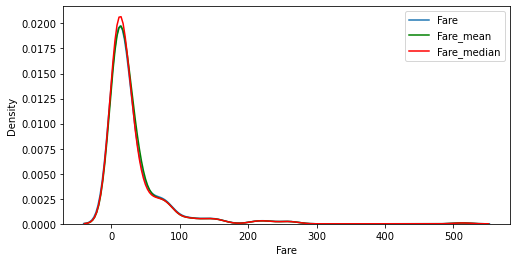

In [67]:
fig , ax = plt.subplots(1,figsize = (8,4))

leg = {'Fare':'blue','Fare_mean':'green','Fare_median':'red'}
sns.kdeplot(X_train['Fare'] )
sns.kdeplot(X_train['Fare_mean'], color = 'green')
sns.kdeplot(X_train['Fare_median'] ,color ='red')
ax.legend(leg ,loc='best')
plt.show()

In [69]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


In [70]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


<AxesSubplot:>

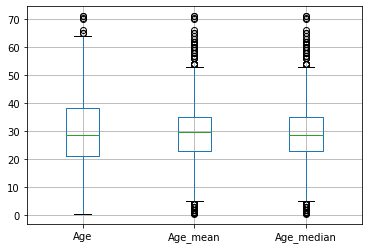

In [72]:
X_train[['Age' , 'Age_mean','Age_median']].boxplot()

<AxesSubplot:>

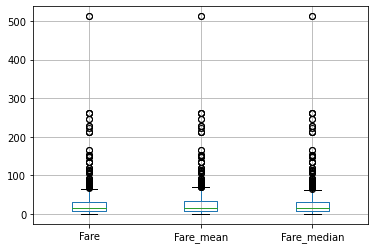

In [74]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [75]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=2)

In [76]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [77]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2' ,imputer2 , ['Fare'])
],remainder='passthrough')

In [78]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [81]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [82]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [83]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [84]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## Arbitrary Value Imputation

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [87]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [89]:
#Age
print('Original Age Variable variance: ', X_train['Age'].var())
print('Age variance after 99 imputation: ', X_train['Age_99'].var())
print('Age variance after -1 imputationVariable: ', X_train['Age_minus1'].var())

print('\n')
# Fare
print('Original Fare Variable variance: ', X_train['Fare'].var())
print('Fare variance after 999 arbitrary imputation: ', X_train['Fare_999'].var())
print('Fare variance after -1 arbitrary imputation : ', X_train['Fare_minus1'].var())


Original Age Variable variance:  204.34951339046142
Age variance after 99 imputation:  951.7275570187188
Age variance after -1 imputationVariable:  318.0896202624488


Original Fare Variable variance:  2448.1979137063163
Fare variance after 999 arbitrary imputation:  47219.202652176304
Fare variance after -1 arbitrary imputation :  2378.5676784883494


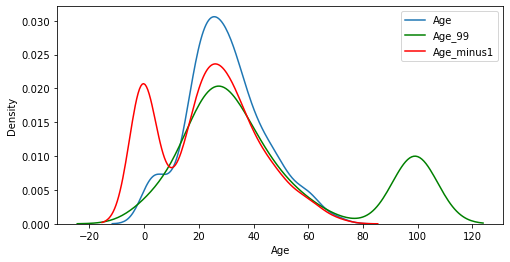

In [93]:
fig , ax = plt.subplots(1,figsize = (8,4))

leg = {'Age':'blue','Age_99':'green','Age_minus1':'red'}
sns.kdeplot(X_train['Age'] )
sns.kdeplot(X_train['Age_99'], color = 'green')
sns.kdeplot(X_train['Age_minus1'] ,color ='red')
ax.legend(leg ,loc='best')
plt.show()

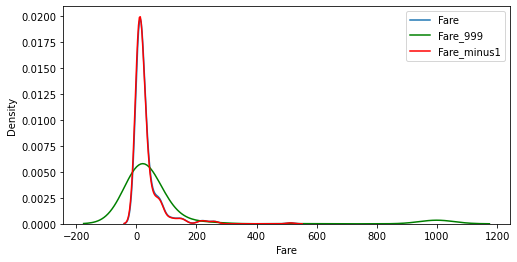

In [92]:
fig , ax = plt.subplots(1,figsize = (8,4))

leg = {'Fare':'blue','Fare_999':'green','Fare_minus1':'red'}
sns.kdeplot(X_train['Fare'] )
sns.kdeplot(X_train['Fare_999'], color = 'green')
sns.kdeplot(X_train['Fare_minus1'] ,color ='red')
ax.legend(leg ,loc='best')
plt.show()

In [94]:
X_train.cov()

,Age,Fare,Family,Age_99,Ageminus1,Fare_999,Fareminus1,Age_minus1,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,204.349513,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,125.558364,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,-4.149246,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,-189.535540,-94.317400
Ageminus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,257.379887,762.474982
Fareminus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,114.394141,2378.567678
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620,114.394141
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,114.394141,2378.567678


In [95]:
X_train.corr()

,Age,Fare,Family,Age_99,Ageminus1,Fare_999,Fareminus1,Age_minus1,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,1.000000,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,0.142022,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,-0.140668,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,-0.344476,-0.062687
Ageminus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,0.066411,0.071946
Fareminus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.131514,1.000000
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000,0.131514
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.131514,1.000000


## ***Using Sklearn***

In [96]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [97]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value=99)
imputer2 = SimpleImputer(strategy= 'constant' , fill_value=999)

In [98]:
trf = ColumnTransformer([
    ('imputer1',imputer1 , ['Age']),
    ('imputer2',imputer2 , ['Fare'])
],remainder='passthrough')

In [99]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [104]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [105]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [106]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

# ***Handling Categorical Missing Data***